In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


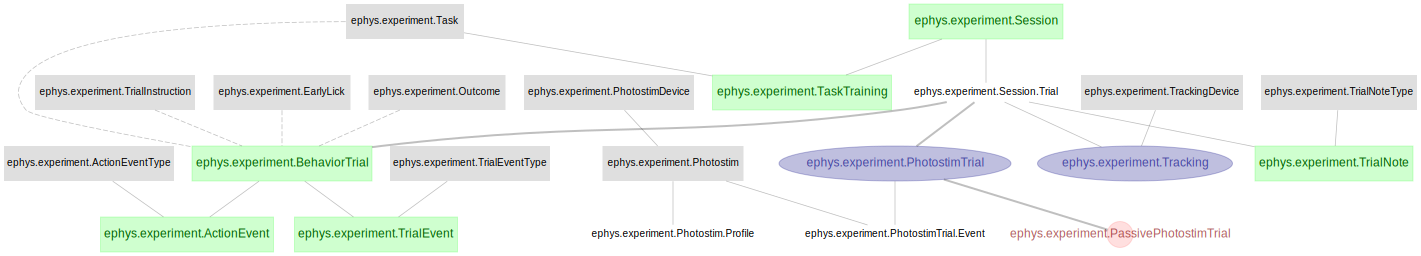

In [3]:
dj.ERD(ephys.experiment)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

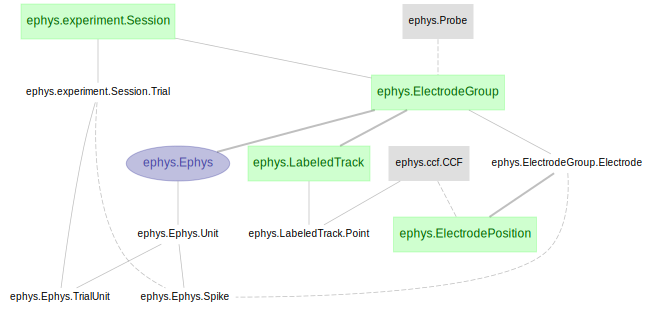

In [5]:
dj.ERD(ephys)-1

In [6]:
behaviorT=ephys.experiment.BehaviorTrial()

In [7]:
contraH=(behaviorT & 'animal = 123456' & 'session =26' & 'outcome = "hit"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')

In [8]:
ipsiH=(behaviorT & 'animal = 123456' & 'session =26' & 'outcome = "hit"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')

In [9]:
contraE=(behaviorT & 'animal = 123456' & 'session =26' & 'outcome = "miss"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')

In [10]:
ipsiE=(behaviorT & 'animal = 123456' & 'session =26' & 'outcome = "miss"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')

In [11]:
ephys1=ephys.Ephys()

In [12]:
spike=ephys1.Spike()

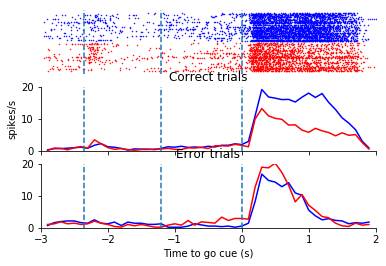

In [13]:
for x in range(87,88):
    unit1=(spike & {'unit': x}).fetch('spike_time','trial')
    binSize=0.1;
    plt.figure()
    ax=plt.subplot(311)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,unit1[1][np.in1d(unit1[1],contraH)]+500,'b.',markersize=1)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,unit1[1][np.in1d(unit1[1],ipsiH)],'r.',markersize=1)
    ax.set_axis_off()
    ax.set_xlim([-3, 2])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    ax = plt.subplot(312)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(contraH)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(ipsiH)/binSize, 'r')
    plt.ylabel('spikes/s')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 20])
    ax.set_xticklabels([])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Correct trials')
    ax = plt.subplot(313)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-2.95,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(contraE)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-2.95,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(ipsiE)/binSize, 'r')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 20])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Error trials')
    plt.xlabel('Time to go cue (s)')

In [18]:
ephys1.Unit()

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,unit,spike_times calculated attribute
123456,26,1,0,=BLOB=
123456,26,1,1,=BLOB=
123456,26,1,2,=BLOB=
123456,26,1,3,=BLOB=
123456,26,1,4,=BLOB=
123456,26,1,5,=BLOB=
123456,26,1,6,=BLOB=


In [129]:
hfNeurons=[]
selectC=[]
selectI=[]
binSize=0.1
for x in range(1,400):
    unit1=(spike & {'unit': x}).fetch('spike_time','trial') # find high firing neurons
    if len(unit1[0])/5/500>3:
        hfNeurons=np.append(hfNeurons, x)
        psthC=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
        psthI=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
        if len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) > len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectC) == 0:
                selectC=(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectC) != 0:
                selectC=np.vstack((selectC, (psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))
        elif len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) > len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectI) == 0:
                selectI=(psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectI) != 0:
                selectI=np.vstack((selectI, (psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))

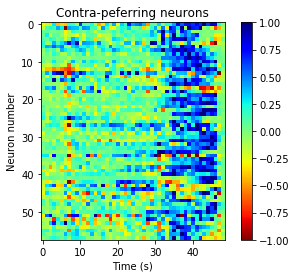

In [130]:
plt.imshow(selectC,vmin=-1, vmax=1)
plt.title('Contra-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()
plt.set_cmap('jet_r')


TypeError: Invalid dimensions for image data

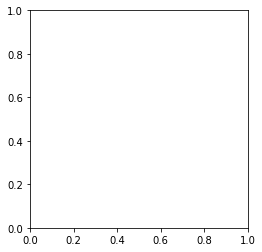

In [112]:
plt.imshow(selectI,vmin=-1, vmax=1)
plt.title('Ipsi-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()
plt.set_cmap('jet_r')


In [123]:
contraH[1:10]

array([ 1,  8,  9, 10, 15, 16, 17, 21, 22], dtype=int64)

In [17]:
# noise correlation